# task4

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
feature1 = cv.imread('feature1.jpeg',cv.IMREAD_GRAYSCALE) # queryImage
feature2 = cv.imread('feature2.jpeg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(feature1,None)
kp2, des2 = orb.detectAndCompute(feature2,None)

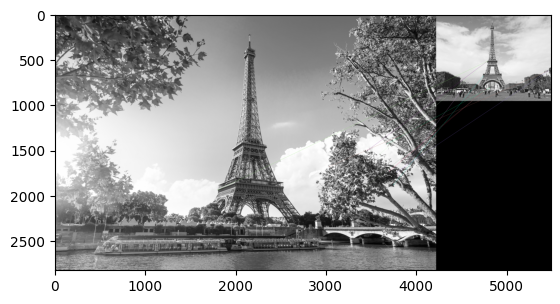

(<matplotlib.image.AxesImage at 0x262dfbd5e50>, None)

In [4]:

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
total = cv.drawMatches(feature1,kp1,feature2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(total),plt.show()

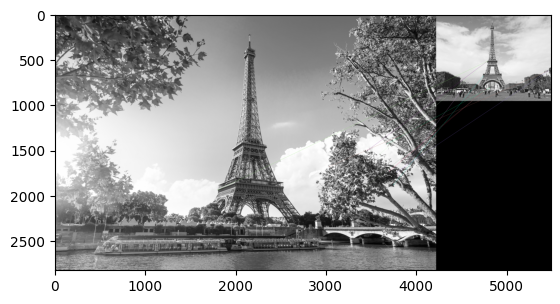

(<matplotlib.image.AxesImage at 0x262e18d7350>, None)

In [8]:

sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(feature1,None)
kp2, des2 = sift.detectAndCompute(feature2,None)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
 if m.distance < 0.75*n.distance:
    good.append([m])

img3 = cv.drawMatchesKnn(feature1,kp1,feature2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(total),plt.show()

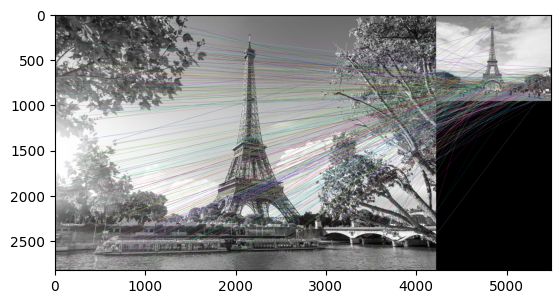

(<matplotlib.image.AxesImage at 0x26281359c50>, None)

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('feature1.jpeg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('feature2.jpeg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

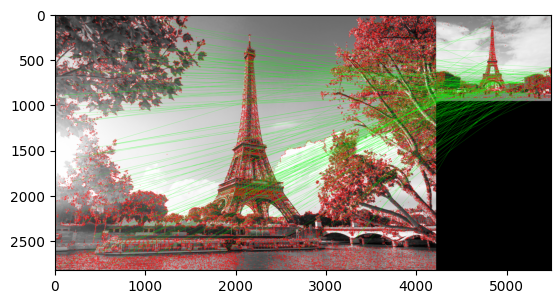

(<matplotlib.image.AxesImage at 0x26287d6c190>, None)

In [16]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('feature1.jpeg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('feature2.jpeg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
 singlePointColor = (255,0,0),
 matchesMask = matchesMask,
 flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

# task5


In [19]:
import cv2 
point1 = None
point2 = None
segment = None
i = 1
def draw_rectangle(event,x,y,flags,param):
    global point1, point2, segment,i
    if event == cv2.EVENT_LBUTTONDOWN:
        if point1 is None:
            point1 = (x,y)
            print(f"Point 1 in rectangle {i}: {point1}")
        elif point2 is None:
            point2 = (x,y)
            print(f"Point 2 in rectangle {i}: {point2}")
            cv2.rectangle(img, (point1[0], point1[1]),(point2[0], point2[1]),(0, 255, 255),-1)
            point1 = None
            point2 = None
            i+=1
img = np.zeros((1000,1000,3), np.uint8)
cv2.namedWindow("Rectangle Window")
cv2.setMouseCallback("Rectangle Window", draw_rectangle)
while True:
    cv2.imshow("Rectangle Window", img)
    if cv2.waitKey(10) == 27:
        break
cv2.destroyAllWindows()